# Homework 1
## Daryna Kosyk

## Problem 1

Let us build an approximate linear regression model of wage:

wage = β0 + β1 * gender + β2 * experience + β3 * training +  β4 * education + u

As the male workers get bigger salaries, β1 for them must be larger than for female workers. If a worker changes his gender from male to female, β1 also changes to a smaller number. Nevertheless, we cannot say that it would carry a 30 percent penalty in pay because there are many factors influencing the formation of the salary, and the wage does not depend linearly on the worker’s gender. Therefore, a wage can change, but not by the exact 30%. 

## Problem 2

As we can see from the very small difference between R^2 and adjusted R^2, the addition of redundant variables does not affect our models much. For "price" dependent variable OLS has described data by 63.6% (making colnclusions based on value of R^2), while for log(price) - by 65.3%. Therefore we can conclude that logarithmic model is a better fit for the data. 

Moving to describing variables' effect on the dependent variables:

1) nox / log(nox)

These variables have the biggest negative impact on the price of the houses for the first and second OLS models respectively (-2,706.433 and -0.789 are the smallest numbers in models). From this we can conclude that Nitrous Oxide concentration in the air is an important factor that very badly affects people's health and stops them from buying houses in certain areas. 

2) crime

This variable also has a negative impact on price and log(price). This is obvious, because the greater the crime rate, the more dangerous the area with the house's location is. 

3) rooms

The variable dist has the greatest positive impact on the dependent variable in first and second regression model. When rooms variable increases by 1 unit, the marginal cost increase is expected to increase by 6,735.498 for "price" dependent variable, by 0.242 for log(price) dependent variable and by 2.767 in logistic regression model. This can be explained by the fact that houses with more rooms are more expensive. 

4) dist, stratio

These variables' coefficients are numerically close for "price" dependent variable and are the same for log(price) variable. They have negative effect on prices, when dist and statio increase. This is caused by the fact that people do not want to drive fat to work and want their children to have a good education (the less students are taught by one teacher, the more attention every one of them gets). In logistic regression model increase of these variables also leads to decrease in price.

For logistic regression we cannot compute R^2. Moreover, we cannot see p-value for log(nox), crime and constant variables in logistic model. Therefore, we do not consider them important to describe in this model. 


##Problem 3

### 1.
a) For the variable hrwage compute the common location measures: mean, median, upper and
lower quartiles, the upper and lower 5%-quantiles. Give an economic interpretation for every location
measure.

Mean - an average value attained.

Median - the middle number of a sorted array of values in the column.

Upper and lower quartiles - 25-th and 75-th percentiles, their value means that 25% and 75% of the data are less or equal to this value (for the variable "hrwage", 25% of the data are less or equal to 2.890002, and 75% of the data are less or equal to 6.210001).

The upper and lower 5%-quantiles - same meaning as for upper and lower quartiles, but the percentiles are 5% and 95%.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from scipy import stats


df = pd.read_csv('sleep_data.csv')
print(f"shape before dropna(): {df.shape}")
df = df.dropna()
print(f"shape after dropna(): {df.shape}")
df.head()




shape before dropna(): (706, 34)
shape after dropna(): (532, 34)


,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0.0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500.0,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500.0,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.0,0.0,12,42500.0,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.0,0.0,14,2500.0,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096


In [ ]:
df['hrwage'].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.95])  

count    532.000000
mean       5.082839
std        3.704385
min        0.350000
5%         1.440000
25%        2.890002
50%        4.379999
75%        6.210001
95%       10.390001
max       35.509987
Name: hrwage, dtype: float64

b) Compute the corresponding measures of variation of data: range, interquartile range, variance.
Comment on the results. Check whether 3 − sigma rule holds true.

Range - difference between maximum and minimum value in the column

Interquartile range - difference between values of 3rd and 1st quartile.

Variance - average of squared deviations of values from the mean, it shows how far a set of numbers is spread away from its mean. 




In [ ]:
def rangecol(a):
  return a.max() - a.min()

def interrange(b):
  q3, q1 = np.percentile(b, [75 ,25])
  return q3 - q1

ranges = []

for column in df:
  ranges.append([str(column), rangecol(df[column]), interrange(df[column]), np.var(df[column]), df[column].count()])
df1b = pd.DataFrame(ranges, columns =['Column name', 'Range', 'Interquartile range', 'Variance', 'Number of columns'])
df1b




,Column name,Range,Interquartile range,Variance,Number of columns
0,age,42.000000,18.000000,1.259423e+02,532
1,black,1.000000,0.000000,4.817613e-02,532
2,case,531.000000,265.500000,2.358525e+04,532
3,clerical,1.000000,0.000000,1.490863e-01,532
4,construc,1.000000,0.000000,2.917067e-02,532
5,educ,16.000000,3.000000,7.241658e+00,532
6,earns74,42500.000000,10250.000000,6.735573e+07,532
7,gdhlth,1.000000,0.000000,1.015144e-01,532
8,inlf,0.000000,0.000000,0.000000e+00,532
9,leis1,5245.000000,1010.000000,7.948095e+05,532


To check if 3-sigma rule holds true, we will check it on one column for hrwage variable. As we can see, after removing outliers from the table, we have removed only 10 entries. This has led to range decreasing by 2.22250149589, which is a lot and informs us that our data was strongly affected by outliers. It is important to note that interquartile range has almost not changed, which confirms the 3-sigma rule - most of the data falls inside of the mean - 3std and 3std + mean. 

In [ ]:
temp_hrwage = df['hrwage'].copy()
temp_hrwage = [x for x in temp_hrwage if 
               (df['hrwage'].mean() - 3*df['hrwage'].std() <= x <= df['hrwage'].mean() + 3*df['hrwage'].std())]
dfhr = pd.DataFrame(temp_hrwage, columns =['hrwage without outliers'])
ranges = []
ranges.append(['hrwage without outliers', rangecol(dfhr['hrwage without outliers']), 
               interrange(dfhr['hrwage without outliers']), np.var(dfhr['hrwage without outliers']), dfhr['hrwage without outliers'].count()])
df2b = pd.DataFrame(ranges, columns =['Column name', 'Range', 'Interquartile range', 'Variance', 'Number of rows'])
df2b

,Column name,Range,Interquartile range,Variance,Number of rows
0,hrwage without outliers,15.820006,3.164999,6.704157,522


c) Plot the histogram of hrwage and the Box-plot. Is the distribution of this variable symmetric?

The distribution of the variable is not symmetric.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a6bc97890>]],
      dtype=object)

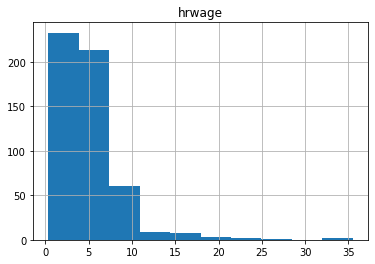

In [ ]:
df.hist(column='hrwage')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


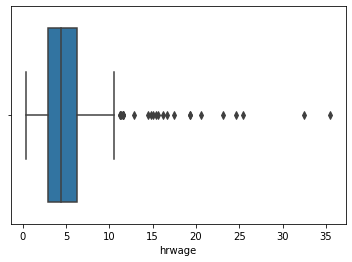

In [ ]:
sns.boxplot(df["hrwage"])

d) Consider the natural logarithm of the hrwage . Plot the histogram for log(hrwage) and
compare it with the histogram for original data


We cn see that the natural logarithm of the hrwageis more sensitive to outliers.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a5d938650>]],
      dtype=object)

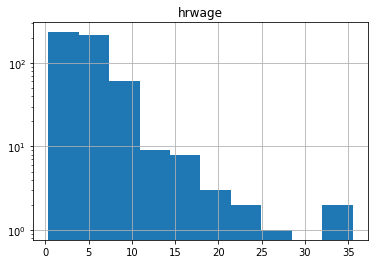

In [ ]:
df.hist(column='hrwage', log = True)

e) Compute the correlation between sleep and hrwage. Plot the corresponding scatterplot.
Make a conclusion whether the relation is linear.

The relation is not linear.

-0.0494499133770386


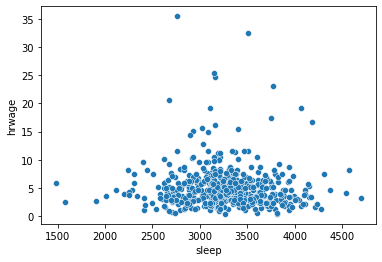

In [ ]:
correlation = df['sleep'].corr(df['hrwage'])
print(correlation)
sns.scatterplot(x=df['sleep'], y=df['hrwage']);

## 2
a) Describe the data. How many observations do we have? Discuss what models can we construct
using this data. What variables can be taken as dependent and independent?

We have 532 valid observations of our data, where there are no empty values. As we have a cross-section data, we can construct OLS and logarithmic regression models. As there are many binary variables (black, clerical, construct etc.), we can costruct logit or probit models as well. We can take different variables as dependent and independent, but it is important for them to be connected to each other. For example, hrwage (hourly wage) can be dependent variable, and educ (years of schooling) and age can be independent variables. On the other hand, choosing black as dependent variable will make no sense. 

In [ ]:
df.describe()


,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.0,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,38.317669,0.050752,266.500000,0.182331,0.030075,12.731203,9703.947368,0.885338,1.0,4659.988722,...,0.524436,2160.545113,0.219925,2130.272556,30.272556,19.586466,0.140977,11.176692,5.082839,1594.186090
std,11.232965,0.219697,153.719441,0.386480,0.170955,2.693566,8214.777772,0.318913,0.0,892.359993,...,0.499873,933.404842,0.414585,929.333193,147.130248,12.188339,0.348326,11.232971,3.704385,935.689295
min,23.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,2090.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,529.000000
25%,29.000000,0.000000,133.750000,0.000000,0.000000,12.000000,3500.000000,1.000000,1.0,4102.750000,...,0.000000,1611.000000,0.000000,1583.750000,0.000000,10.000000,0.000000,0.000000,2.890002,841.000000
50%,36.000000,0.000000,266.500000,0.000000,0.000000,12.000000,8250.000000,1.000000,1.0,4595.000000,...,1.000000,2300.000000,0.000000,2288.000000,0.000000,17.000000,0.000000,8.000000,4.379999,1296.000000
75%,47.000000,0.000000,399.250000,0.000000,0.000000,15.000000,13750.000000,1.000000,1.0,5112.750000,...,1.000000,2700.000000,0.000000,2652.250000,0.000000,29.000000,0.000000,18.250000,6.210001,2209.000000
max,65.000000,1.000000,532.000000,1.000000,1.000000,17.000000,42500.000000,1.000000,1.0,7335.000000,...,1.000000,6415.000000,1.000000,6415.000000,1337.000000,55.000000,1.000000,43.000000,35.509987,4225.000000


In [ ]:
#we use min of all of the numbers of rows for every column, 
#because we want to count only rows with all of the variables present.
min(df.count()) 

532

b) Choose one of variables sleep, totwrk, hrwage to construct linear regression model. Choose
independent variables and fit a linear regression.

I have chosen hrwage variable to construct linear regression model. Firslty I have checked coorelation between one independent and all of the dependent variables, to get rid of too strongly and too weekly correlated variables. Then I have created a heatmap to check whether there are variables that are strongly correlated, and got rid of the variable totwrk, which correlated with worknrm by 99%. 

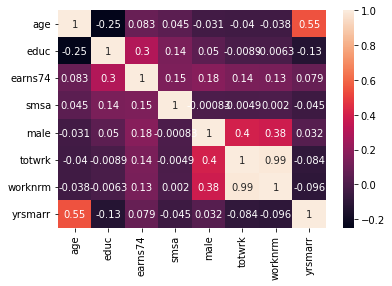

In [ ]:
corrs = []
for column in df:
  corrs.append((str(column), df['hrwage'].corr(df[column])))
corrs = [x for x in corrs if ( 0.1 <= x[1] <= 0.8)]
new = df[['age', 'educ', 'earns74', 'smsa', 'male', 'totwrk', 'worknrm', 'yrsmarr']]
sns.heatmap(new.corr(), annot=True)
plt.show()

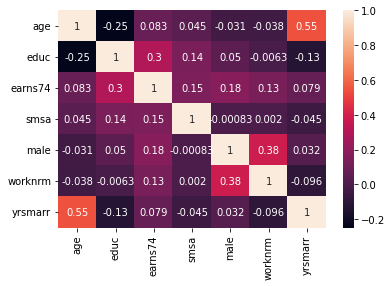

In [ ]:
new = df[['age', 'educ', 'earns74', 'smsa', 'male', 'worknrm', 'yrsmarr']]
sns.heatmap(new.corr(), annot=True)
plt.show()

In [ ]:
# here is a fitted linear regression
model = smf.ols(formula = 'hrwage ~  age + educ + earns74 + smsa + male + worknrm  + yrsmarr', data = df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 hrwage   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     40.22
Date:                Thu, 12 May 2022   Prob (F-statistic):           2.92e-45
Time:                        21:06:52   Log-Likelihood:                -1336.6
No. Observations:                 532   AIC:                             2689.
Df Residuals:                     524   BIC:                             2724.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0052      0.968     -2.071      0.039      -3.907      -0.103
age            0.0301      0.014      2.086      0.037       0.002       0.058
educ           0.2154      0.053      4.029      0.000       0.110       0.320
earns74        0.0002   1.73e-05      9.628      0.000       0.000       0.000
smsa           0.4867      0.273      1.782      0.075      -0.050       1.023
male           2.1312      0.288      7.404      0.000       1.566       2.697
worknrm     1.864e-05      0.000      0.121      0.904      -0.000       0.000
yrsmarr        0.0150      0.014      1.064      0.288      -0.013       0.043
==============================================================================
Omnibus:                      405.111   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9108.994
Skew:                           3.108   Prob(JB):                         0.00
Kurtosis:                      22.295   Cond. No.                     9.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

c) Pick up one independent variable and write down the corresponding hypothesis of the t-test.
Interpret in Your own words what this hypothesis means.

H0: $\beta$educ = 0 (this hypothesis means that there is no correlation between independent variable sleep and dependent variable educ, as we assume that coefficient near educ is 0).

H1: $\beta$educ != 0 (here we assume thet correletion exists, as $\beta$educ is supposed to be less or greater than 0).



(d) (1 pt.) Construct the test for the sign of coefficients for some of independent variable. State your
intuitive expectation. Formulate the hypotheses. Test them. Interpret the result.

As the result of the test is False, we reject H0 and accept H1. This is obviously true, because education must be correlated with the hourly wage. 

In [ ]:
t_value = 0.2154/0.053
print(t_value)
p_value = stats.t.sf(abs(t_value), df.shape[0])
print(p_value)
c = stats.t.ppf(1-p_value , df.shape[0] - 1)
print(c)
print(t_value > c)

4.064150943396227
2.7742253836768024e-05
4.064213379868325
False
